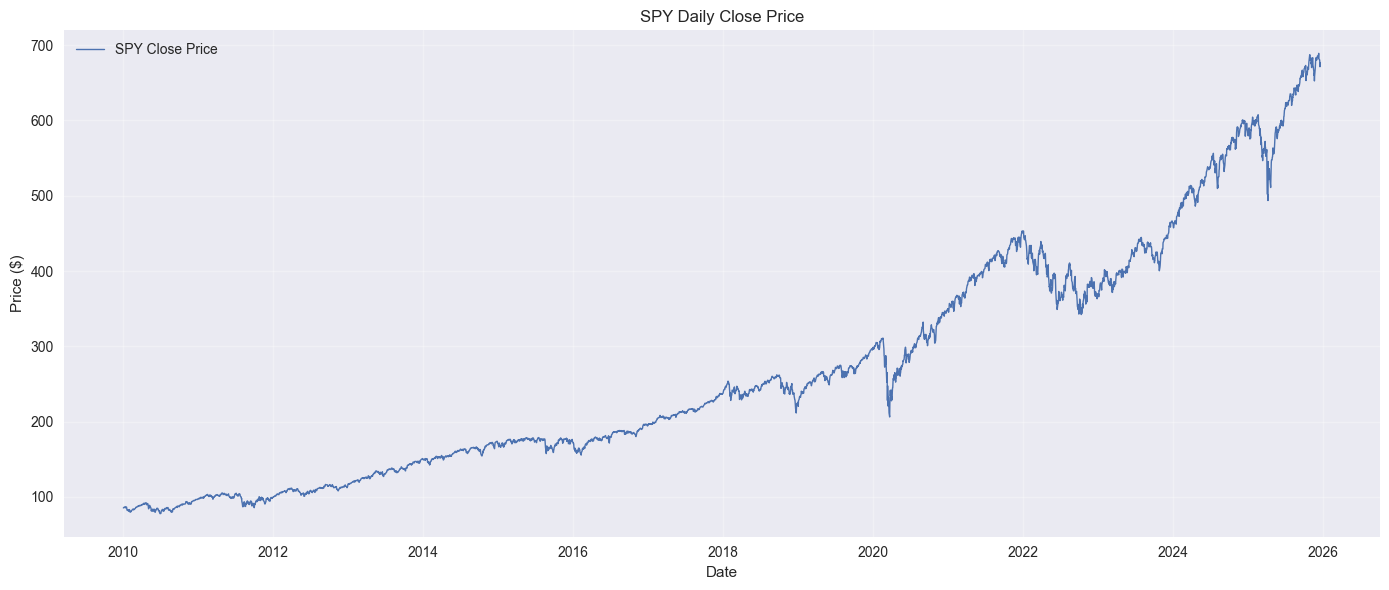

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/SPY_daily.csv')
# print(df.head())
# print(df.dtypes)
# print(df['Adj Close'].head())
# print(df['Adj Close'].describe())
df['Date'] = pd.to_datetime(df['Date'])
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')

df = df.set_index('Date').sort_index()

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Adj Close'], label='SPY Close Price', linewidth=1.0)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('SPY Daily Close Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Daily Returns Analysis

In [2]:
import numpy as np

# Compute daily returns
df['daily_ret'] = df['Adj Close'].pct_change()
df['log_ret'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Drop the initial NaN
df = df.dropna()

print(f"DataFrame shape after computing returns: {df.shape}")
print(f"\nFirst few rows:")
print(df[['Adj Close', 'daily_ret', 'log_ret']].head())

DataFrame shape after computing returns: (4015, 8)

First few rows:
            Adj Close  daily_ret   log_ret
Date                                      
2010-01-05  85.504951   0.002647  0.002644
2010-01-06  85.565140   0.000704  0.000704
2010-01-07  85.926384   0.004222  0.004213
2010-01-08  86.212311   0.003328  0.003322
2010-01-11  86.332680   0.001396  0.001395


C:\Users\yadav\AppData\Local\Temp\ipykernel_10112\3762961445.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['daily_ret'] = df['Adj Close'].pct_change()


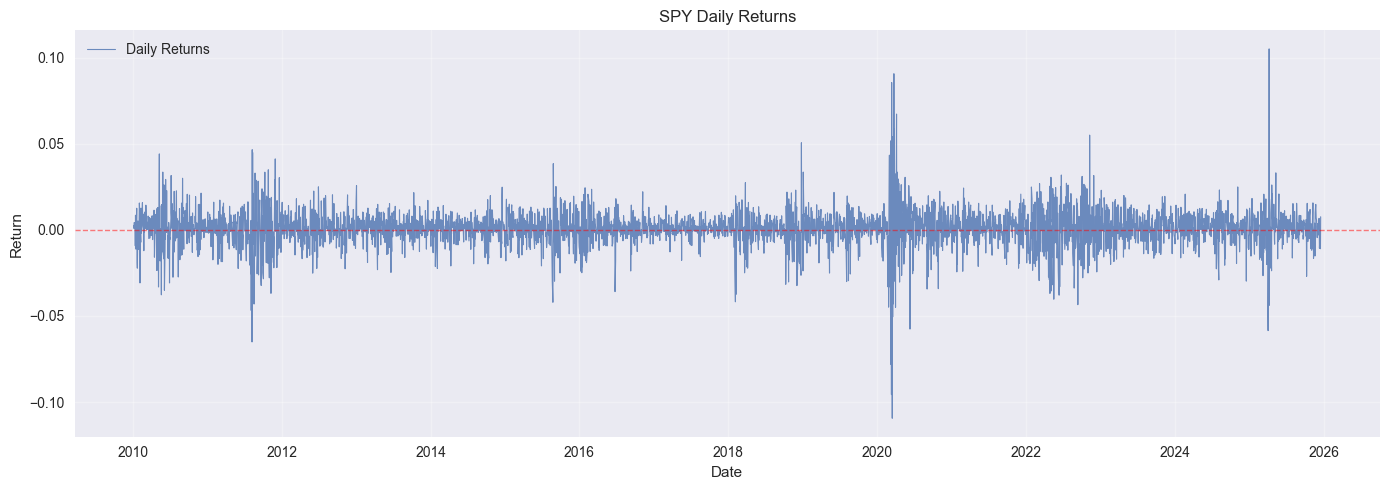

In [3]:
# Plot daily returns time series
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['daily_ret'], label='Daily Returns', linewidth=0.8, alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('SPY Daily Returns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

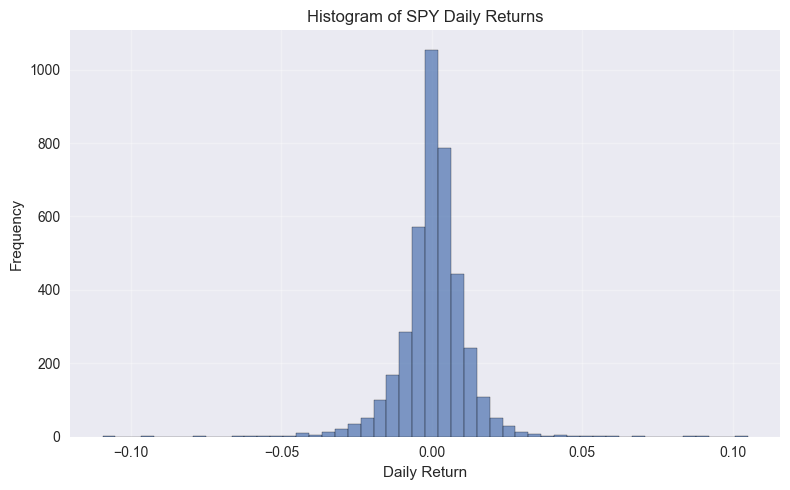

In [4]:
# Plot histogram of daily returns
plt.figure(figsize=(8, 5))
plt.hist(df['daily_ret'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Histogram of SPY Daily Returns')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Descriptive statistics for daily returns
print("=== Descriptive Statistics for SPY Daily Returns ===\n")
print(df['daily_ret'].describe())
print(f"\nSkewness: {df['daily_ret'].skew():.4f}")
print(f"Kurtosis: {df['daily_ret'].kurtosis():.4f}")
print(f"\nNote: Kurtosis > 3 indicates heavier tails than normal distribution (excess kurtosis = {df['daily_ret'].kurtosis() - 3:.4f})")

=== Descriptive Statistics for SPY Daily Returns ===

count    4015.000000
mean        0.000575
std         0.010849
min        -0.109424
25%        -0.003708
50%         0.000705
75%         0.005790
max         0.105019
Name: daily_ret, dtype: float64

Skewness: -0.3341
Kurtosis: 12.1006

Note: Kurtosis > 3 indicates heavier tails than normal distribution (excess kurtosis = 9.1006)


## Save Combined Figure

Create a single figure with price, returns, and histogram for documentation.

✓ Combined figure saved to: ..\figures\price_and_returns.png


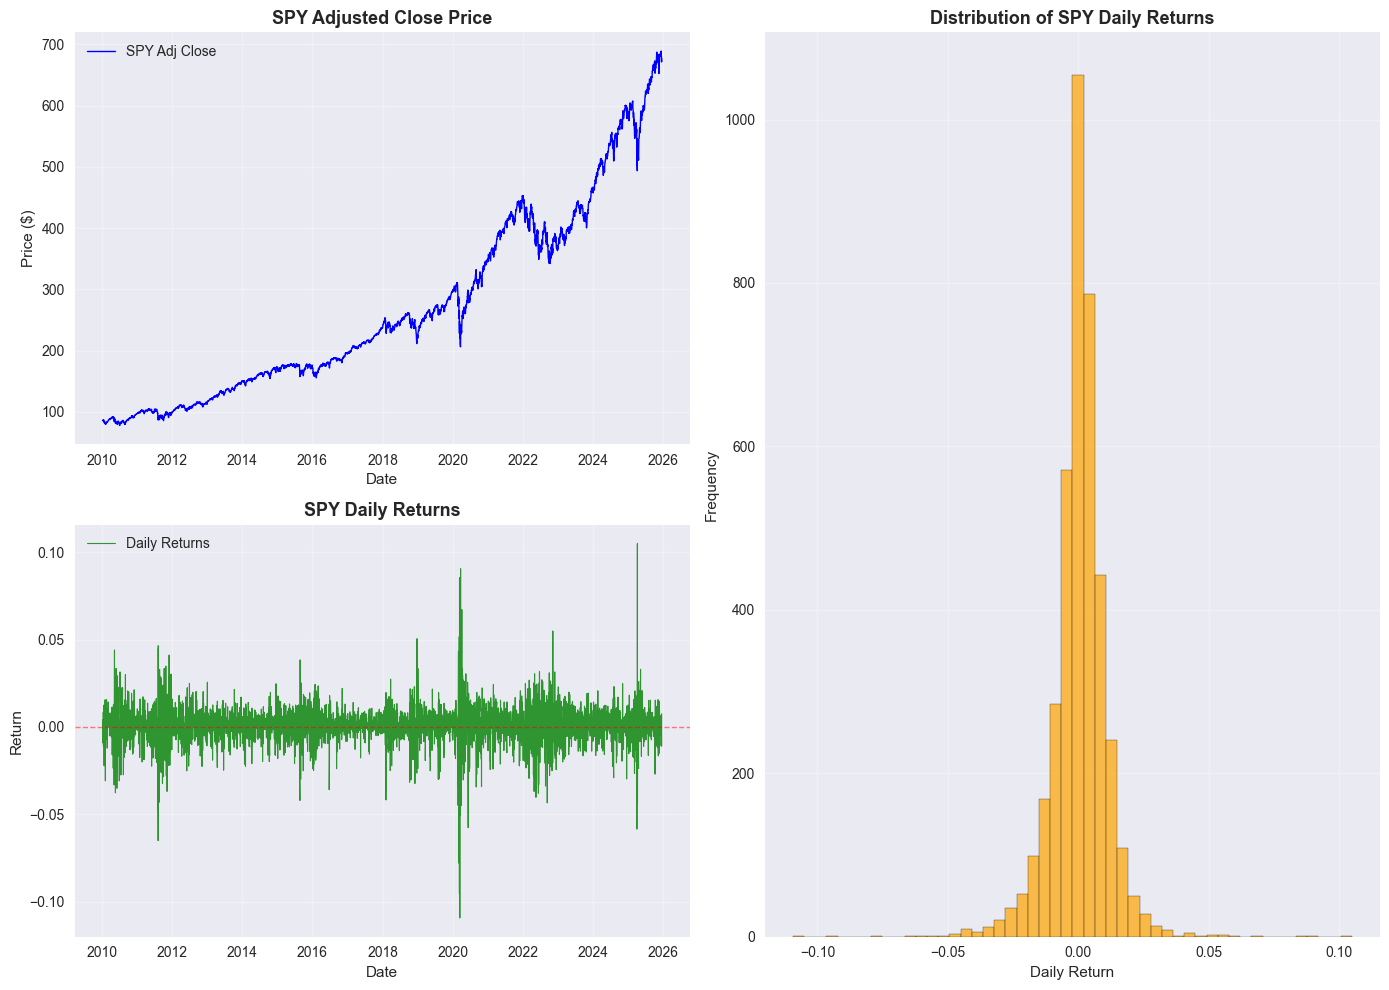

In [6]:
from pathlib import Path

# Create figure with 2x2 grid, right column spanning both rows
fig = plt.figure(figsize=(14, 10))

# Top-left: Price vs date
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(df.index, df['Adj Close'], label='SPY Adj Close', linewidth=1.0, color='blue')
ax1.set_xlabel('Date', fontsize=11)
ax1.set_ylabel('Price ($)', fontsize=11)
ax1.set_title('SPY Adjusted Close Price', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom-left: Returns vs date
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.plot(df.index, df['daily_ret'], label='Daily Returns', linewidth=0.8, alpha=0.8, color='green')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Return', fontsize=11)
ax2.set_title('SPY Daily Returns', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Right column (spanning both rows): Histogram
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
ax3.hist(df['daily_ret'], bins=50, edgecolor='k', alpha=0.7, color='orange')
ax3.set_xlabel('Daily Return', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Distribution of SPY Daily Returns', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save figure
out_dir = Path("..") / "figures"
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "price_and_returns.png"
fig.savefig(out_path, dpi=200, bbox_inches='tight')

print(f"✓ Combined figure saved to: {out_path}")
plt.show()